In [2]:
# Plot H1 rejection rate plots

import pandas as pd
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.ticker as mticker
import os

In [3]:
# number of vectors sent
K = 5
# number of replications
nrep = 100
# number of training iterations
niter = np.array(range(K + 1))
# variable names
listSting = list(map(str, list(range(1,(K+1)))))

sig1= 0.6
sig2= 0.9

sigList = [0.6, 0.9]

In [4]:
fixedU = "TRUE"
LapscaleList = [0.1, 0.5]


In [5]:

Xdist="uniform"
sig=0.9
nList = [200, 2000]


In [6]:
def readPV_array(n, Lapscale, k):
    # filename = "ridgeTestingPV_testSetting_H1_betasetting_"+ str(k) +"_n_" + str(n) + "_Xdist_" + Xdist + "_sig_"  + str(sig) +  "_fixedU_" + fixedU + "_Lapscale_" + str(Lapscale) 

    # SettingName = 'Setting ' + str(k) + ', n=' + str(n) +', ' + r'$\rho=' +str(sig) + '$' + ', ' + r'$lap(' +str(Lapscale) + ')$'

    data_tmp = pd.read_csv("data/testing/ridgeTestingPV_testSetting_H1_betasetting_"+ str(k) +"_n_" + str(n) + "_Xdist_" + Xdist + "_sig_"  + str(sig) +  "_fixedU_" + fixedU + "_Lapscale_" + str(Lapscale) + ".csv" , header = 0)  
    data_tmp = data_tmp[['V' + s  for s in listSting]]
    pV_array = data_tmp.to_numpy()
    return pV_array

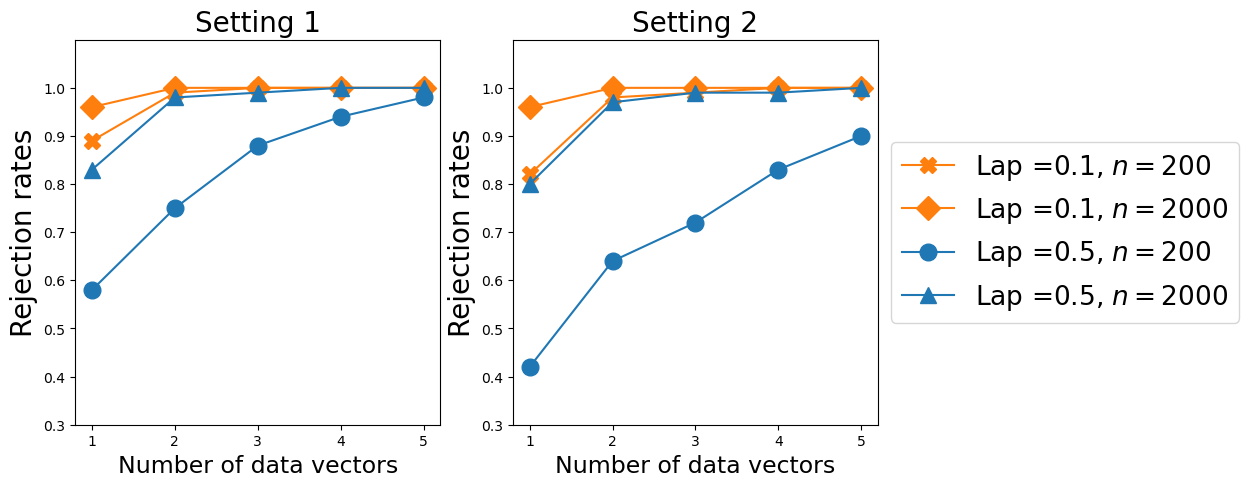

In [21]:
colorList = ['tab:orange', 'tab:blue', 'tab:purple']
markerList = ["X", "D", "o", "^",  "P", "*"]

fig = plt.figure()
fig.set_size_inches(16, 5)   
# fig.suptitle(corrtype, fontsize=20) 
for i in range(2):
    # setting index
    setInd = i + 1

    # plot the plots in each setting    
    ax = fig.add_subplot(int('13' + str(setInd)))
    # number of data vectors sent
    VecInd = np.array(range(1, (K+1)), int)

    markerInd = 0
    for LapscaleInd in range(len(LapscaleList)):
        Lapscale = LapscaleList[LapscaleInd]
        for n in nList:
            rej_mean = np.mean((readPV_array(n, Lapscale, setInd) < 0.05), axis = 0)
            ax.plot(VecInd, rej_mean, label = 'Lap =' + str(Lapscale)+ ', ' + r'$n=' +str(n) + '$', color = colorList[LapscaleInd], marker = markerList[markerInd], markersize=12)
            if i==1:
                plt.legend(prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
            elif i<1:
                plt.legend('',frameon=False)

            markerInd = markerInd + 1
    plt.ticklabel_format(style='plain', axis='x', useOffset=False)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.ylim([0.3,1.1])
    plt.yticks(np.arange(0.3,1.04,0.1))
    #plt.subplots_adjust(left=1, bottom=0.6, right=2, top=1, wspace=0.5, hspace=0)
    ax.set_xlabel("Number of data vectors", fontsize=17)
    ax.set_ylabel("Rejection rates", fontsize=20)
    ax.set_title("Setting "+str(setInd), fontsize=20)
    #plt.tight_layout()
filename = "ridgeTestingPV_testSetting_H1"+ "_Xdist_" + Xdist + "_sig_"  + str(sig) +  "_fixedU_" + fixedU  

#===========================create folder to store output results=====================
results_path_data = "./Result_Figure"
# Check whether the specified path exists or not
isExist = os.path.exists(results_path_data)

if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(results_path_data)
plt.savefig('Result_Figure/' + filename+'.pdf')

In [13]:
def plotLam(k, nList, sig, Lapscale, Xdist, fixedU):

	# the list named ticks, summarizes or groups
	# the summer and winter rainfall as low, mid
	# and high 
	lam_arrayList = []
	ticks = ['t= 1', 't= 2', 't= 3', 't= 4', 't= 5']
	for n in nList:
		filename = "ridgeTestingPV_testSetting_H1_betasetting_"+ str(k) +"_n_" + str(n) + "_Xdist_" + Xdist + "_sig_"  + str(sig) +  "_fixedU_" + fixedU + "_Lapscale_" + str(Lapscale) 

		SettingName = 'Setting ' + str(k) + ', n=' + str(n) +', ' + r'$\rho=' +str(sig) + '$' + ', ' + r'$lap(' +str(Lapscale) + ')$'

		data_tmp = pd.read_csv("data/testing/ridgeTestingPV_testSetting_H1_betasetting_"+ str(k) +"_n_" + str(n) + "_Xdist_" + Xdist + "_sig_"  + str(sig) +  "_fixedU_" + fixedU + "_Lapscale_" + str(Lapscale) + ".csv" , header = 0)  
		data_tmp = data_tmp[['V' + s  for s in listSting]]
		lam_array = data_tmp.to_numpy()
		lam_arrayList.append(lam_array)

	lam_array_list1 = lam_arrayList[0]
	lam_array_list2 = lam_arrayList[1]

	summer_rain_plot = plt.boxplot(lam_array_list1,
								positions=np.array(
		np.arange(lam_array_list1.shape[1]))*2.0-0.35,
								widths=0.6)
	winter_rain_plot = plt.boxplot(lam_array_list2,
								positions=np.array(
		np.arange(lam_array_list2.shape[1]))*2.0+0.35,
								widths=0.6)

	# each plot returns a dictionary, use plt.setp()
	# function to assign the color code
	# for all properties of the box plot of particular group
	# use the below function to set color for particular group,
	# by iterating over all properties of the box plot
	def define_box_properties(plot_name, color_code, label):
		for k, v in plot_name.items():
			plt.setp(plot_name.get(k), color=color_code)
		# use plot function to draw a small line to name the legend.
		plt.plot([], c=color_code, label=label)
		plt.legend(bbox_to_anchor=(1.4, 1.05))


	# setting colors for each groups
	define_box_properties(summer_rain_plot, '#D7191C', 'n=200')
	define_box_properties(winter_rain_plot, '#2C7BB6', 'n=2000')

	SettingName = 'Setting ' + str(k) + ', ' + r'$\rho=' +str(sig) + '$' + ', ' + r'$lap(' +str(Lapscale) + ')$'
	plt.title(SettingName)
	# set the x label values
	plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)

	# set the limit for x axis
	plt.xlim(-2, len(ticks)*2)
	plt.tight_layout()
	plt.savefig('Result_Figure/' + filename +'_lam.pdf')
	plt.close()


In [14]:
for k in np.arange(1, 3):
    for Lapscale in LapscaleList:
        plotLam(k, nList, sig, Lapscale, Xdist, fixedU)